# Data - FashionMNIST

> FashionMNIST DataModule

In [ ]:
#| default_exp fashionmnist

In [ ]:
#| exports
import torch
import torchvision.transforms.functional as F

from slow_diffusion.data import DiffusionDataModule, noisify, show_images

/Users/jeremiahfisher/miniforge3/envs/slow_diffusion/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# |exports
def fashion_mnist_noisify(x_0):
    x_0 = F.convert_image_dtype(x_0, torch.float)
    # zero-center so that the mean does not change after adding noise
    x_0 -= 0.5
    return noisify(x_0)

In [ ]:
dm = DiffusionDataModule("fashion_mnist", fashion_mnist_noisify, 4)
dm.setup()

Map: 100%|████████████| 10000/10000 [00:01<00:00, 8099.03 examples/s]


In [ ]:
(x_t, ts), _ = next(iter(dm.train_dataloader()))
x_t.shape, x_t.min(), x_t.max()

(torch.Size([4, 1, 28, 28]), tensor(-3.0939), tensor(3.1606))

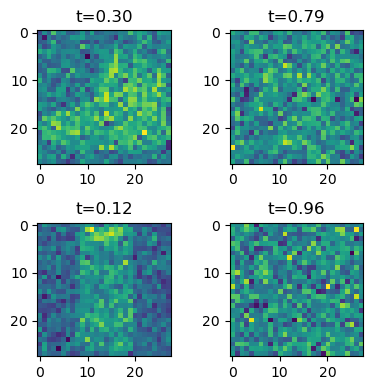

In [ ]:
show_images(x_t, [f"t={t.item():.2f}" for t in ts])

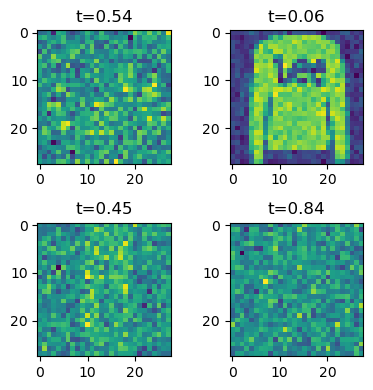

In [ ]:
(x_t, ts), _ = next(iter(dm.val_dataloader()))
x_t.shape, x_t.min(), x_t.max()
show_images(x_t, [f"t={t.item():.2f}" for t in ts])

In [ ]:
#| hide
import nbdev

nbdev.nbdev_export()